# Recommender System (MovieLens 20M)

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
!nvidia-smi -L
print(f'Tensorflow version: {tf.__version__}')

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)
Tensorflow version: 2.3.1


Download MovieLens 20M dataset at http://files.grouplens.org/datasets/movielens/ml-20m.zip.

In [3]:
df = pd.read_csv('data/ratings.csv')
df['newUserId'] = pd.Categorical(df['userId']).codes
df['newMovieId'] = pd.Categorical(df['movieId']).codes

U = df['newUserId'].to_numpy()
M = df['newMovieId'].to_numpy()
y = df['rating'].to_numpy()

U_train, U_test, M_train, M_test, y_train, y_test = train_test_split(U, M, y, test_size=0.2)

UN = len(U)
MN = len(M)
D = 10

Epoch 1/25
16000210/16000210 [==============================] - 39s 2us/sample - loss: 0.8046 - val_loss: 0.7308
Epoch 2/25
16000210/16000210 [==============================] - 37s 2us/sample - loss: 0.7059 - val_loss: 0.7001
Epoch 3/25
16000210/16000210 [==============================] - 38s 2us/sample - loss: 0.6835 - val_loss: 0.6885
Epoch 4/25
16000210/16000210 [==============================] - 37s 2us/sample - loss: 0.6670 - val_loss: 0.6811
Epoch 5/25
16000210/16000210 [==============================] - 37s 2us/sample - loss: 0.6563 - val_loss: 0.6714
Epoch 6/25
16000210/16000210 [==============================] - 37s 2us/sample - loss: 0.6480 - val_loss: 0.6666
Epoch 7/25
16000210/16000210 [==============================] - 37s 2us/sample - loss: 0.6387 - val_loss: 0.6610
Epoch 8/25
16000210/16000210 [==============================] - 36s 2us/sample - loss: 0.6243 - val_loss: 0.6490
Epoch 9/25
16000210/16000210 [==============================] - 37s 2us/sample - loss: 0.6099 - 

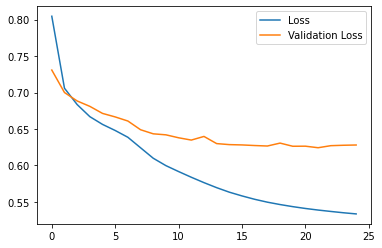

In [4]:
u = tf.keras.Input(shape=(1,))
m = tf.keras.Input(shape=(1,))
u_emb = tf.keras.layers.Embedding(UN, D)(u)
m_emb = tf.keras.layers.Embedding(MN, D)(m)
u_emb = tf.keras.layers.Flatten()(u_emb)
m_emb = tf.keras.layers.Flatten()(m_emb)
x = tf.keras.layers.Concatenate()([u_emb, m_emb])
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs=[u, m], outputs=x)

model.compile(optimizer=tf.keras.optimizers.SGD(0.08, 0.9),
              loss='mse')

r = model.fit([U_train, M_train], y_train,
              validation_data=([U_test, M_test], y_test),
              epochs=25,
              batch_size=1024)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()